In [68]:
#Dependencies and Setup

import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats as st 

#Import the CSVs

country_path = "archive/co2_emissions_kt_by_country.csv"
population_path = "archive/population_by_country.csv"

country_data = pd.read_csv(country_path)
population_data = pd.read_csv(population_path)

country_data

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675000
1,ABW,Aruba,1961,11576.719000
2,ABW,Aruba,1962,12713.489000
3,ABW,Aruba,1963,12178.107000
4,ABW,Aruba,1964,11840.743000
...,...,...,...,...
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114


In [69]:
population_data.sort_values(["country_code"])

,country_code,country_name,year,value
0,ABW,Aruba,1960,54608.0
33,ABW,Aruba,1993,72360.0
34,ABW,Aruba,1994,74710.0
35,ABW,Aruba,1995,77050.0
36,ABW,Aruba,1996,79417.0
...,...,...,...,...
16363,ZWE,Zimbabwe,1985,8690515.0
16364,ZWE,Zimbabwe,1986,8983044.0
16365,ZWE,Zimbabwe,1987,9277488.0
16351,ZWE,Zimbabwe,1973,5712712.0


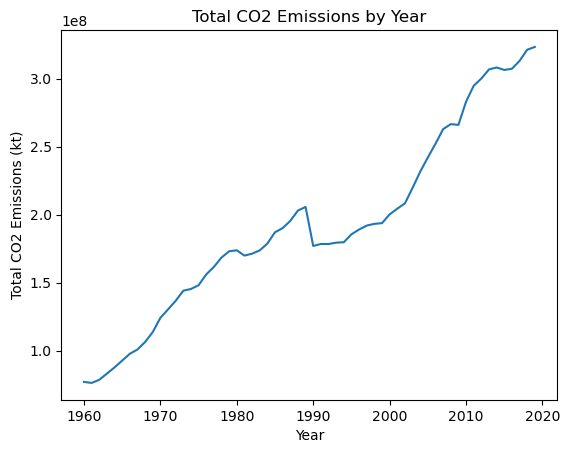

In [70]:
total_country_emissions_per_year = country_data.groupby("year")["value"].sum()
total_country_emissions_per_year

#Creating a line plot to visulize the total data set grouped by year

country_x_axis = total_country_emissions_per_year.index
country_y_axis = total_country_emissions_per_year.values

plt.plot(country_x_axis,country_y_axis)

plt.xlabel("Year")
plt.ylabel("Total CO2 Emissions (kt)")
plt.title("Total CO2 Emissions by Year")

plt.show()

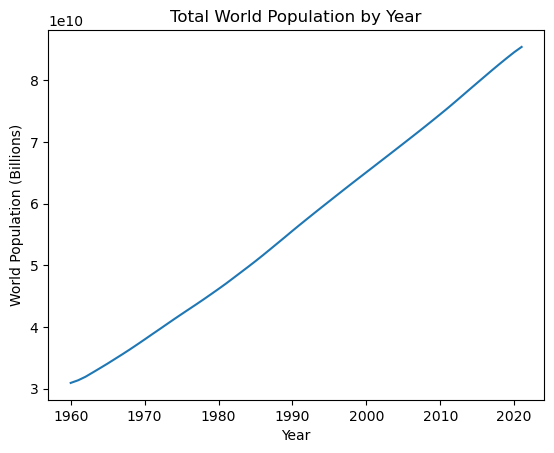

In [71]:
population_by_year = population_data.groupby("year")["value"].sum()
population_by_year

#Creating a line plot to visulize the total data set grouped by year

pop_x_axis = population_by_year.index
pop_y_axis = population_by_year.values

plt.plot(pop_x_axis,pop_y_axis)

plt.xlabel("Year")
plt.ylabel("World Population (Billions)")
plt.title("Total World Population by Year")

plt.show()

In [72]:
#merge the dfs to create a new one 
country_results_merged_df = pd.merge(population_data, country_data, how = "left", on = ["country_code", "year", "country_name"])

#rename the columns
country_results_merged_df.rename(columns = 
    {
    "value_x": "population",
    "value_y": "emissions (kt)"
    }, inplace = True)

country_results_merged_df


,country_code,country_name,year,population,emissions (kt)
0,ABW,Aruba,1960,54608.0,11092.675000
1,ABW,Aruba,1961,55811.0,11576.719000
2,ABW,Aruba,1962,56682.0,12713.489000
3,ABW,Aruba,1963,57475.0,12178.107000
4,ABW,Aruba,1964,58178.0,11840.743000
...,...,...,...,...,...
16395,ZWE,Zimbabwe,2017,14751101.0,10340.000153
16396,ZWE,Zimbabwe,2018,15052184.0,12380.000114
16397,ZWE,Zimbabwe,2019,15354608.0,11760.000229
16398,ZWE,Zimbabwe,2020,15669666.0,NaN


In [73]:
#Getting rid of all NaN columns
#nan_df = country_results_merged_df
#print(nan_df[nan_df.isnull().any(axis=1)])

#nan_df = nan_df.dropna(how = "any")
#nan_df

In [74]:
#Getting rid of all NaN columns
print(country_results_merged_df[country_results_merged_df.isnull().any(axis=1)])

country_results_merged_df = country_results_merged_df.dropna(how = "any")

country_results_merged_df

      country_code country_name  year  population  emissions (kt)
57             ABW        Aruba  2017    105439.0             NaN
58             ABW        Aruba  2018    105962.0             NaN
59             ABW        Aruba  2019    106442.0             NaN
60             ABW        Aruba  2020    106585.0             NaN
61             ABW        Aruba  2021    106537.0             NaN
...            ...          ...   ...         ...             ...
16339          ZWE     Zimbabwe  1961   3925952.0             NaN
16340          ZWE     Zimbabwe  1962   4049778.0             NaN
16341          ZWE     Zimbabwe  1963   4177931.0             NaN
16398          ZWE     Zimbabwe  2020  15669666.0             NaN
16399          ZWE     Zimbabwe  2021  15993524.0             NaN

[2477 rows x 5 columns]


,country_code,country_name,year,population,emissions (kt)
0,ABW,Aruba,1960,54608.0,11092.675000
1,ABW,Aruba,1961,55811.0,11576.719000
2,ABW,Aruba,1962,56682.0,12713.489000
3,ABW,Aruba,1963,57475.0,12178.107000
4,ABW,Aruba,1964,58178.0,11840.743000
...,...,...,...,...,...
16393,ZWE,Zimbabwe,2015,14154937.0,12430.000305
16394,ZWE,Zimbabwe,2016,14452704.0,11020.000458
16395,ZWE,Zimbabwe,2017,14751101.0,10340.000153
16396,ZWE,Zimbabwe,2018,15052184.0,12380.000114


In [75]:
country_results_merged_df['emissions (tons)'] = country_results_merged_df['emissions (kt)'] * 1000
country_results_merged_df

/var/folders/b2/sbj6w5n50csf0pst2fgp0q7m0000gn/T/ipykernel_4674/1431230733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_results_merged_df['emissions (tons)'] = country_results_merged_df['emissions (kt)'] * 1000


,country_code,country_name,year,population,emissions (kt),emissions (tons)
0,ABW,Aruba,1960,54608.0,11092.675000,1.109268e+07
1,ABW,Aruba,1961,55811.0,11576.719000,1.157672e+07
2,ABW,Aruba,1962,56682.0,12713.489000,1.271349e+07
3,ABW,Aruba,1963,57475.0,12178.107000,1.217811e+07
4,ABW,Aruba,1964,58178.0,11840.743000,1.184074e+07
...,...,...,...,...,...,...
16393,ZWE,Zimbabwe,2015,14154937.0,12430.000305,1.243000e+07
16394,ZWE,Zimbabwe,2016,14452704.0,11020.000458,1.102000e+07
16395,ZWE,Zimbabwe,2017,14751101.0,10340.000153,1.034000e+07
16396,ZWE,Zimbabwe,2018,15052184.0,12380.000114,1.238000e+07


In [76]:
country_results_merged_df['emissions per capita'] = country_results_merged_df['emissions (tons)'] / country_results_merged_df['population']
country_results_merged_df

/var/folders/b2/sbj6w5n50csf0pst2fgp0q7m0000gn/T/ipykernel_4674/3348973454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_results_merged_df['emissions per capita'] = country_results_merged_df['emissions (tons)'] / country_results_merged_df['population']


,country_code,country_name,year,population,emissions (kt),emissions (tons),emissions per capita
0,ABW,Aruba,1960,54608.0,11092.675000,1.109268e+07,203.132783
1,ABW,Aruba,1961,55811.0,11576.719000,1.157672e+07,207.427192
2,ABW,Aruba,1962,56682.0,12713.489000,1.271349e+07,224.294997
3,ABW,Aruba,1963,57475.0,12178.107000,1.217811e+07,211.885289
4,ABW,Aruba,1964,58178.0,11840.743000,1.184074e+07,203.526127
...,...,...,...,...,...,...,...
16393,ZWE,Zimbabwe,2015,14154937.0,12430.000305,1.243000e+07,0.878139
16394,ZWE,Zimbabwe,2016,14452704.0,11020.000458,1.102000e+07,0.762487
16395,ZWE,Zimbabwe,2017,14751101.0,10340.000153,1.034000e+07,0.700965
16396,ZWE,Zimbabwe,2018,15052184.0,12380.000114,1.238000e+07,0.822472


# formatting turns everything into strings

In [77]:

#Formatting the columns 
country_results_merged_df["population"] = country_results_merged_df["population"].map("{:,.0f}".format)

country_results_merged_df["emissions (kt)"] = country_results_merged_df["emissions (kt)"].map("{:,.4f}".format)
country_results_merged_df["emissions per capita"] = country_results_merged_df["emissions per capita"].map("{:,.4f}".format)

#Resets the index since we drop columns
country_results_merged_df.reset_index(drop = True)

/var/folders/b2/sbj6w5n50csf0pst2fgp0q7m0000gn/T/ipykernel_4674/778057021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_results_merged_df["population"] = country_results_merged_df["population"].map("{:,.0f}".format)
/var/folders/b2/sbj6w5n50csf0pst2fgp0q7m0000gn/T/ipykernel_4674/778057021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_results_merged_df["emissions (kt)"] = country_results_merged_df["emissions (kt)"].map("{:,.4f}".format)
/var/folders/b2/sbj6w5n50csf0pst2fgp0q7m0000

,country_code,country_name,year,population,emissions (kt),emissions (tons),emissions per capita
0,ABW,Aruba,1960,"54,608","11,092.6750",1.109268e+07,203.1328
1,ABW,Aruba,1961,"55,811","11,576.7190",1.157672e+07,207.4272
2,ABW,Aruba,1962,"56,682","12,713.4890",1.271349e+07,224.2950
3,ABW,Aruba,1963,"57,475","12,178.1070",1.217811e+07,211.8853
4,ABW,Aruba,1964,"58,178","11,840.7430",1.184074e+07,203.5261
...,...,...,...,...,...,...,...
13918,ZWE,Zimbabwe,2015,"14,154,937","12,430.0003",1.243000e+07,0.8781
13919,ZWE,Zimbabwe,2016,"14,452,704","11,020.0005",1.102000e+07,0.7625
13920,ZWE,Zimbabwe,2017,"14,751,101","10,340.0002",1.034000e+07,0.7010
13921,ZWE,Zimbabwe,2018,"15,052,184","12,380.0001",1.238000e+07,0.8225


In [81]:
sorted_df = country_results_merged_df.sort_values("emissions per capita", ascending=True)
sorted_df.tail(50)

,country_code,country_name,year,population,emissions (kt),emissions (tons),emissions per capita
5504,GNQ,Equatorial Guinea,2008,"994,971","9,779.9997",9.780000e+06,9.8294
10641,NCL,New Caledonia,1999,"209,214","2,057.1870",2.057187e+06,9.8329
12241,PST,Post-demographic dividend,2017,"1,106,214,534","10,881,188.4594",1.088119e+10,9.8364
10933,NOR,Norway,1981,"4,099,702","40,329.6660",4.032967e+07,9.8372
1101,BEL,Belgium,2007,"10,625,700","104,589.9963",1.045900e+08,9.8431
7414,KAZ,Kazakhstan,1996,"15,578,227","153,390.0000",1.533900e+08,9.8464
3636,DNK,Denmark,2000,"5,339,616","52,600.0000",5.260000e+07,9.8509
12818,SGP,Singapore,1974,"2,229,800","21,968.9970",2.196900e+07,9.8525
1434,BHS,"Bahamas, The",1968,"165,456","1,631.8150",1.631815e+06,9.8625
10631,NCL,New Caledonia,1989,"166,898","1,646.4830",1.646483e+06,9.8652
